# COT5600 Homework Assignment 2

Daniel Silva

In [0]:
import numpy as np
import matplotlib.pyplot as plt

### Simulating the Hadamard Test

In [0]:
# Defining our basis states |0> and |1>

Zero = np.matrix([1, 0], dtype=np.float32).reshape((2,1))
One = np.matrix([0,1], dtype=np.float32).reshape((2,1))

In [0]:
def create_rot_matrix(theta):
  """
  Returns the rotation matrix for theta
  Rotation matrix is defined below:
  [cos(theta) -sin(theta)]
  [sin(theta) cos(theta)]
  """

  cos, sin = np.cos(theta), np.sin(theta)
  rot_mat = np.matrix([cos, -sin, sin, cos]).reshape((2,2))

  return rot_mat

In [0]:
def hadamard_test(psi, U):
  """
  Applies the hadamard test to an initial state, psi, given a single qubit unitary U
  Outputs the probability of measuring |0> when estimating <psi|U|psi>
  """
  
  # The equation used below is formulated by simplifying the following steps
      # Apply hadamard gate to the first qubit
      # Apply controlled U gate to the system
      # Apply hadamard gate to the first qubit once again
  
  # Compute state change
  resulting_state = np.kron(1/2*Zero, psi + U*psi) + np.kron(1/2*One, psi - U*psi)
 
  # Create projector P = |0><0| otimes I
  n = len(psi)
  P = np.kron(Zero*Zero.H, np.eye(n))

  # Calculate the probability of measuring |0>
  prob_0 = np.linalg.norm(P*resulting_state) ** 2  
  
  return prob_0

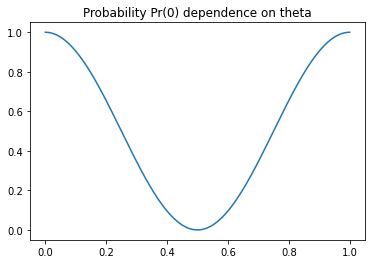

In [5]:
# We'll run the hadamard test using values of theta between 0 and 1
# Each value of theta will be used to create a unitary U, which is used in the hadamard test
thetas = np.linspace(0, 1, 10000)

# Array to store probabilities of measuring |0>, Pr(0), for each value of theta from [0,1)
probs = []

# Loop through each theta value and run the hadamard test
for theta in thetas:

    # Create unitary, U, which will be the rotation matrix for angle = 2*pi*theta
    angle = 2 * np.pi * theta
    U = create_rot_matrix(angle)

    # Run hadamard test with initial state |0> and U from above
    prob = hadamard_test(Zero, U)

    # Store result
    probs.append(prob)

# Plot results
plt.plot(thetas, probs)
plt.title('Probability Pr(0) dependence on theta')
plt.show()

The plot above shows that the probability of observing |0> increases as the angle used to create the unitary U decreases. Recall that to compute the angle, the equation 2 * pi * theta is used. Therefore, when theta is close to 0 or 1, the angle reaches 0 degrees. In this case, the probability of observing |0> reaches 1. When theta is closer to 0.5, the angle used reaches 180 degrees, which results in a near 0% chance of observing |0>.

### Simulating the SWAP test

The matrix representation of the SWAP gate is defined as follows:

S = |00><00| + |01><10| + |10><01| + |11><11|

In [0]:
# Creating each state needed to compute swap gate matrix

ZeroZero = np.kron(Zero, Zero)
OneOne = np.kron(One, One)
ZeroOne = np.kron(Zero, One)
OneZero = np.kron(One, Zero)

In [7]:
# Compute swap gate matrix

S = (ZeroZero*ZeroZero.H) + (ZeroOne*OneZero.H) + (OneZero*ZeroOne.H) + (OneOne*OneOne.H)
print(S)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


The SWAP test will be implemented using the hadamard test from above, where the controlled operation is now the controlled SWAP gate, defined below:

|0><0| otimes I + |1><1| otimes S

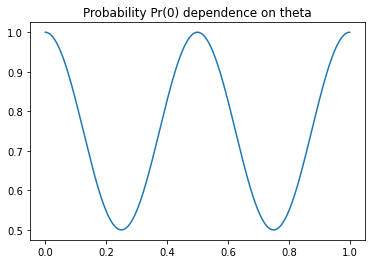

In [8]:
# This time, we'll run the SWAP test using values of theta between 0 and 1
# For the SWAP test, theta will be used when creating the initial states
thetas = np.linspace(0, 1, 10000)

# Array to store probabilities of measuring |0>, Pr(0), for each value of theta from [0,1)
probs = []

# Loop through each theta value and run the SWAP test
for theta in thetas:
  
    # Create our two intial states psi_1 and psi_2
    # The SWAP test will output how different these two states are
    psi_1 = Zero
    
    angle = 2 * np.pi * theta 
    psi_2 = np.cos(angle)*Zero + np.sin(angle)*One

    # Calculate state of the target register psi = psi_1 otimes psi_2
    psi = np.kron(psi_1, psi_2)
    
    # Run hadamard test with initial state psi and swap gate matrix S as the unitary
    prob = hadamard_test(psi, S)

    # Store result
    probs.append(prob)

# Plot results
plt.plot(thetas, probs)
plt.title('Probability Pr(0) dependence on theta')
plt.show()

Recall that the SWAP test checks how similar or dissimilar two quantum states are. After executing the SWAP test, if the probability of measuring |0> is 0, this means the two initial states were orthogonal, while a probability of 1 means they were the same.

Additionally, for our SWAP tests, state 1 was always |0>, while state 2 is dependent on theta by the following relationship: cos(2 pi theta) |0> + sin(2 pi theta) |1>. Based on this, we can reason behind the results shown in the plot above. 

When theta is near 0, 0.5, or 1, the resulting angle is near 0 or 180 degrees. When this angle is used to create state number 2, the state becomes similar to |0>. When theta is near 0.25, or 0.75, the resulting angle is 90 or 270 degree, which results in a state that is orthogonal to |0>. The plot above visualizes this relationship between states 1 and 2.